# Exploration project (5) : 인공지능과 가위바위보
==============================================================================================================

## 목차
### (1) 필요한 모듈 import 하기
### (2) 가위바위보 이미지 resize 하기
### (3) 이미지 학습시키기
### (4) 결과 확인
### (5) 회고
### (6) Reference
### (7) 자기 다짐
---

## 루브릭 달성 조건
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
   - 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc/ train loss/ val acc/ val loss) 해 보았음.
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
   - 오버피팅 극복을 위하여 데이터의 다양성, 정규화 등을 2가지 이상 시도해보았음.
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가? 
   - 60% 이상 도달하였음.
  ---

### (1) 필요한 모듈 import 하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import glob

---
### (2) 가위바위보 이미지 resize 하기

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(f"해당 경로의 이미지 갯수는 {len(images)}장 입니다.")
    target_size = (48,48)
    
    for img in images:
        origin_img = Image.open(img)
        # new_img = old_img.resize(target_size, Image.ANTIALIAS) ANTIALIAS를 더이상 지원하지 않음
        new_img = origin_img.resize(target_size, Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")
        
    print(f"해당 경로의 이미지 {len(images)}장이 {target_size}로 변환되었습니다.")
    print('------------------------------------------------------------------')
    
r_path = "./new_data/train/rock"
s_path = "./new_data/train/scissor"
p_path = "./new_data/train/paper"
resize_images(r_path)
resize_images(s_path)
resize_images(p_path)

해당 경로의 이미지 갯수는 1936장 입니다.
해당 경로의 이미지 1936장이 (48, 48)로 변환되었습니다.
------------------------------------------------------------------
해당 경로의 이미지 갯수는 2002장 입니다.
해당 경로의 이미지 2002장이 (48, 48)로 변환되었습니다.
------------------------------------------------------------------
해당 경로의 이미지 갯수는 1923장 입니다.
해당 경로의 이미지 1923장이 (48, 48)로 변환되었습니다.
------------------------------------------------------------------


- 이전에 촬영해 놓은 가위, 바위, 보의 이미지를 이용하여 train data의 이미지를 resize하여 48x48의 형태로 만들어 줍니다.

In [3]:
test_r_path = "./new_data/test/rock"
test_s_path = "./new_data/test/scissor"
test_p_path = "./new_data/test/paper"

resize_images(test_r_path)
resize_images(test_s_path)
resize_images(test_p_path)

해당 경로의 이미지 갯수는 668장 입니다.
해당 경로의 이미지 668장이 (48, 48)로 변환되었습니다.
------------------------------------------------------------------
해당 경로의 이미지 갯수는 607장 입니다.
해당 경로의 이미지 607장이 (48, 48)로 변환되었습니다.
------------------------------------------------------------------
해당 경로의 이미지 갯수는 637장 입니다.
해당 경로의 이미지 637장이 (48, 48)로 변환되었습니다.
------------------------------------------------------------------


- test data 또한 train과 같이 48x48의 형태로 변환해주었습니다.

---
### (3) 이미지 학습시키기

In [4]:
def load_data(img_path, number_of_data=0):
    # 가위 : 0 , 바위 : 1 , 보 : 2
    img_size = 48
    color = 3
    
    # 이미지 데이터와 라벨데이터를 담은 행렬 영역 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    print(imgs.shape)
    
    index = 0
    for file in glob.iglob(img_path + "/scissor/*.jpg"):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[index, :, :, :] = img
        labels[index] = 0
        index=index+1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[index, :, :, :] = img
        labels[index] = 1
        index=index+1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[index, :, :, :] = img
        labels[index] = 2
        index=index+1
        
    print('----------------------------------------------------')
    print("데이터의 이미지 개수는", f"{index}개", "입니다.")
    print('----------------------------------------------------')
    return imgs, labels

- 위에서 변환한 이미지를 이용하여 각각 numpy 배열로 바꾼 후 라벨을 입력해줍니다.
- 각각 라벨은 scissor = 0, rock = 1, paper = 2 로 지정하였습니다.

In [5]:
image_dir_path = "./new_data/train"
test_dir_path = "./new_data/test"
(x_train, y_train) = load_data(image_dir_path, 5861)
(x_test, y_test) = load_data(test_dir_path, 1912)
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

(5861, 48, 48, 3)
----------------------------------------------------
데이터의 이미지 개수는 5861개 입니다.
----------------------------------------------------
(1912, 48, 48, 3)
----------------------------------------------------
데이터의 이미지 개수는 1912개 입니다.
----------------------------------------------------
x_train shape: (5861, 48, 48, 3)
y_train shape: (5861,)
x_test shape: (1912, 48, 48, 3)
y_test shape: (1912,)


- train data와 test data를 255.0으로 나누어 0과 1사이의 값으로 정규화하였습니다.
- 255.0 으로 나눈 이유는 이미지에 존재하는 RGB 채널의 각각 값이 0 ~ 255 사이의 값으로 존재하기에 최솟값 0, 최댓값 1로 만들기 위해 255.0으로 나누어 줍니다.

In [9]:
channel_1 = 24
channel_2 = 48
dense = 18
epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(channel_1, (2,2), activation='relu', input_shape = (48, 48, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(channel_2, (1,1), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련
model.fit(x_train_norm, y_train, epochs = epoch)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 47, 47, 24)        312       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 24)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 48)        1200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 48)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5808)              0         
                                                                 
 dense_2 (Dense)             (None, 18)               

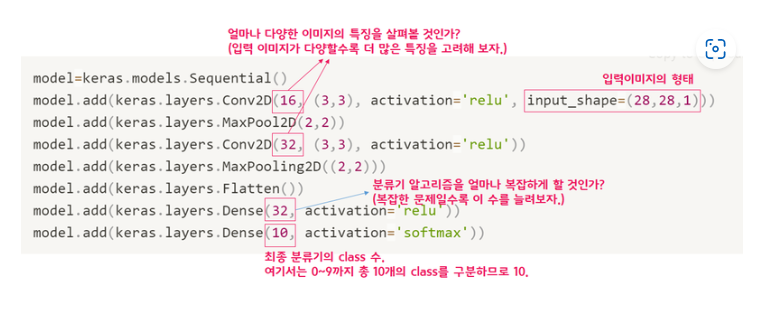

- 하이퍼파라미터로 channel_1, channel_2, dense, epoch 를 지정하였고 Sequential 함수를 이용하여 Layer을 생성해주었습니다.
  
  
- 1번 Conv2D layer에서는 channel_1을 24로 stride는 (2,2)로 지정하여 큰 틀을 잡을 수 있게 지정하였습니다.
   
  
  
- 2번 Conv2D layer에서는 channel_2를 48로 stride는 (1,1)로 지정하여 위에서 잡은 큰 틀을 좀 더 세밀하고 촘촘하게 확인할 수 있도록 설정하였습니다.
  
  
- 각 layer에 대한 maxpooling은 (2,2)로 지정하였고 다른 값도 지정해보았으나 가장 효과적이었기에 (2,2)로 지정하였습니다.
  
  
- dense 또한 8,12,16,24,30,48 등등 많은 수를 적용해 보았으나 너무 큰 값은 낮은 정확도를 가져오게 되었고 적절한 값으로 18이 좋겠다고 판단하게되어 지정하였습니다.
  
  
- epoch 또한 7,8,9,10,15,20 등 많이 적용해 보았으나 10이 가장 효과적이었고 위의 epoch = 10이 가장 적절하다고 판단되어 지정하였습니다.
  
  
- 하지만 아무리 시도를 해도 overfitting을 막을 수는 없었습니다..
  
  
- 각 Layer 별로 relu 함수를 이용하였으며 분류가 0,1,2인 데이터셋이기에 출력층의 함수를 softmax로 지정하여 클래스를 3개로 나누어주었습니다.

### Conv2D layer란?
- 각 이미지 픽셀의 대표 특성들을 추려내는 방식
- 이미지 픽셀에 필터를 대입하여 커널 사이즈만큼의 부분으로 특징을 추출한다.
- 이 필터는 픽셀 내부에서 stride 만큼 옮겨가며 전체의 픽셀을 커버한다.

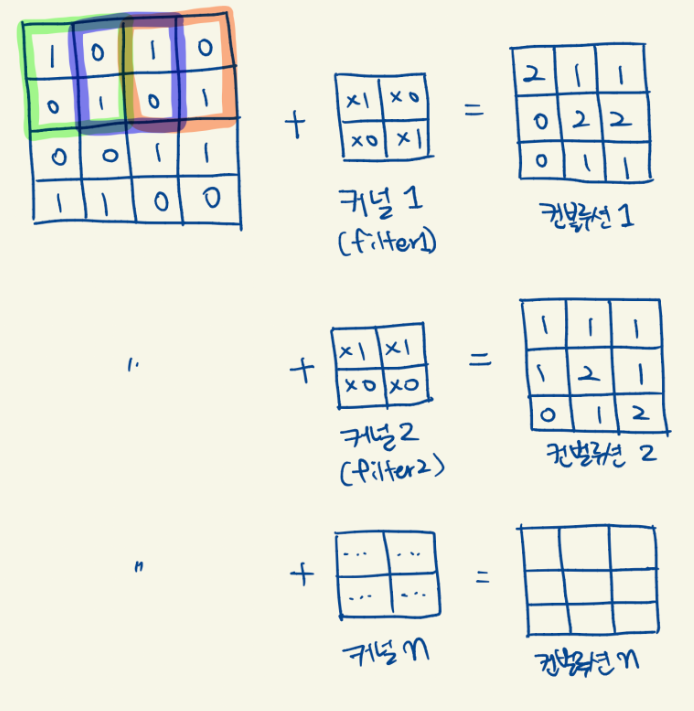


### Conv2D의 파라미터
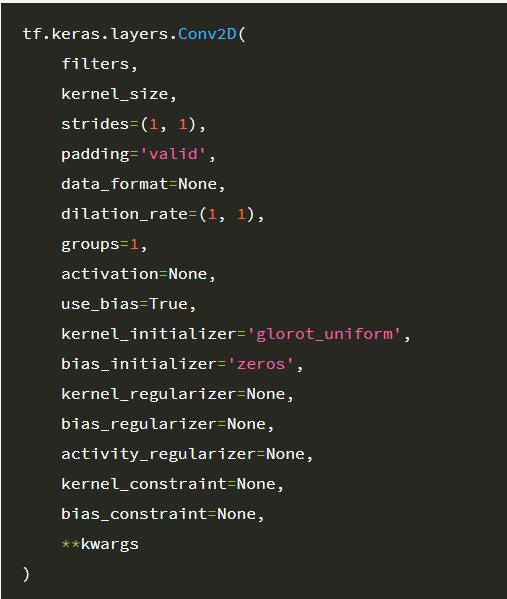

- 기본적인 파라미터들
  - filters : 커널의 갯수
  - kernel_size : 커널 사이즈 정의, (2,2), (3,3) 과 같이 정수로 적는다.
  - stride : 커널(필터)가 얼마만큼씩 옮겨갈지 정한다. 커널사이즈와 같이 정수로 적는다.
  - padding : 기본적으로 Conv2D를 거치면 기존 픽셀의 가로세로대비가 줄어들기 때문에 이를 방지하기 위해 padding을 사용한다. 기존픽셀 주변부에 0을 넣어줌으로써 픽셀의 크기를 키운 후 적용하면 기존의 픽셀 크기와 같은 컨볼루션 결과물을 얻을 수 있다.
  - activation(default: None) : 활성화함수
  - input_shape = 처음의 Conv2D에 지정해주어야한다. input image와 동일한 크기

### Pooling layer란?

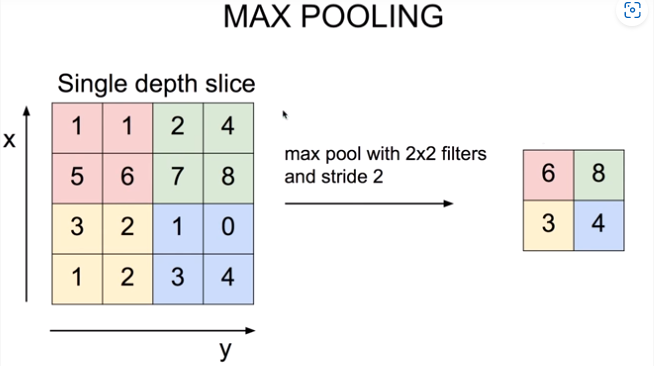

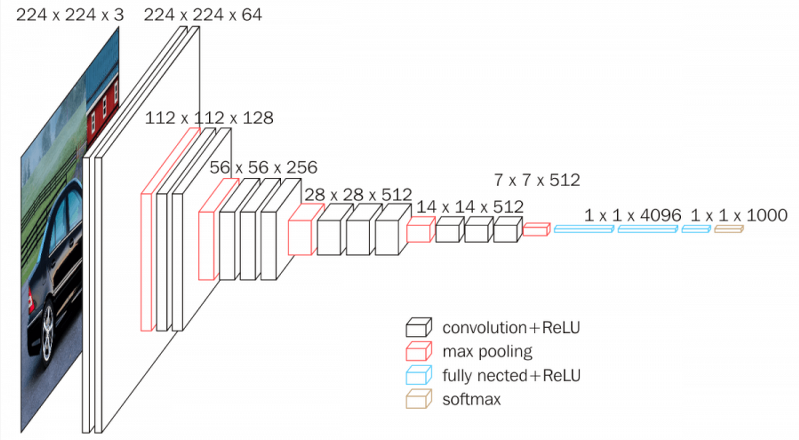

- Pooling을 하는 중요한 이유로는 데이터의 차원 감소 때문이다.
- 이는 신경망의 계산 효율성이 좋아지고 메모리 요구량의 감소로 이어진다.

### Dense layer란?
- Dense 레이어는 입력과 출력을 모두 연결해주며, 입력과 출력을 각각 연결해주는 가중치를 포함하고 있다. 즉, 입력이 4개, 출력이 8개라면 가중치는 총 32개가 존재한다.  그리고 이 Dense 레이어는 가장 머신러닝에 기본적인 층으로 영상이나 서로 연속적으로 상관관계가 있는 데이터가 아니라면 이 층을 통해 학습 시킬 수 있는 데이터가 많다.

### activation 함수로 무엇을 선택할까?

- 일반적으로 relu를 이용한다. 은닉층으로 역전파를 통해 좋은 성능이 나오기 때문이다.
- sigmoid 함수는 마지막층에서 이진분류 문제일때 많이 사용하게 된다.
- softmax 함수는 클래스 분류 문제일 때 많이 사용하게 된다.

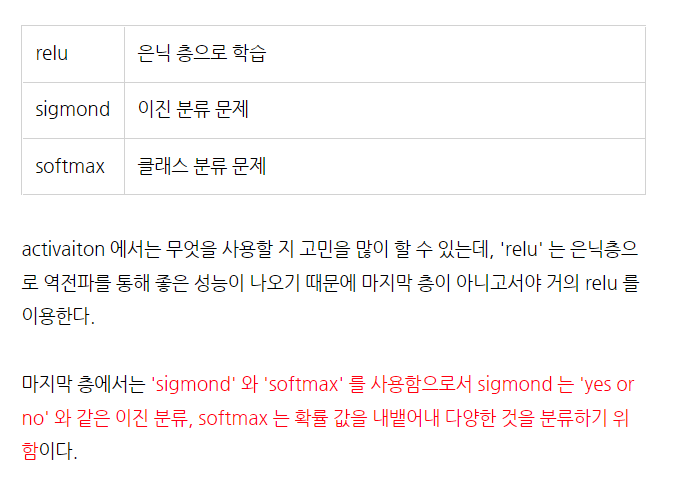

In [10]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"손실오차 : {test_loss}")
print(f"정확도 : {test_accuracy*100} %")

60/60 - 1s - loss: 1.5406 - accuracy: 0.6402 - 509ms/epoch - 8ms/step
손실오차 : 1.5406334400177002
정확도 : 64.01673555374146 %


- 결과값이 나왔군요
- 정확도는 64%, 손실 오차는 1.5정도로 괜찮은 값이 나왔습니다.

---
### (4) 결과 확인

- 제 모델이 제대로 잡아내지 못한 이미지는 무엇인지 확인해 보겠습니다.
- 랜덤하게 지정하여 3개만 뽑아서 확인해보도록 하겠습니다.

60/60 [==============================] - 0s 7ms/step
예측확률분포: [0.38951015 0.10189645 0.5085934 ]
라벨: 0, 예측결과: 2


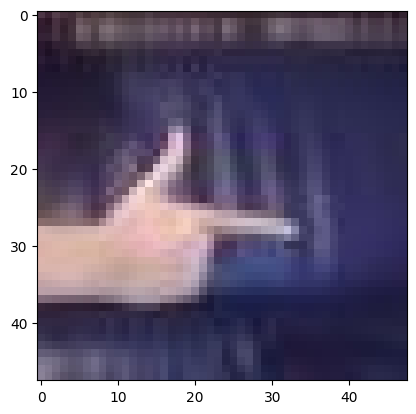

예측확률분포: [0.8791858  0.02337555 0.09743869]
라벨: 2, 예측결과: 0


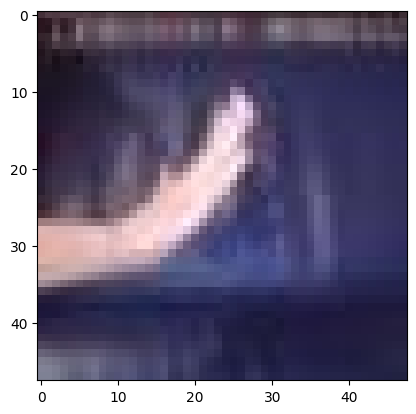

예측확률분포: [1.2661986e-02 9.5217223e-07 9.8733705e-01]
라벨: 0, 예측결과: 2


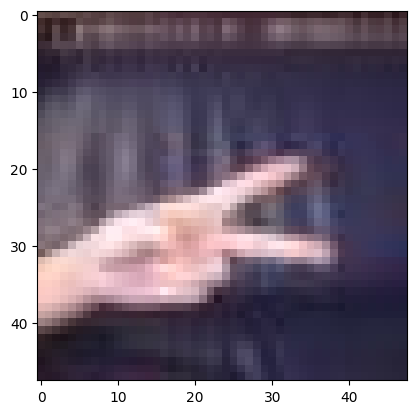

In [12]:
import random

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=3)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

- 확인해보니 가위와 보를 구분을 잘 못하는군요.
- 아무래도 손가락의 갯수, 손가락의 펴짐 등등 손가락에 관하여 잘 구분하지 못하는듯 합니다.

---
### (5) 회고

- 이번 프로젝트를 진행하면서 어려웠던 점으로는 일단 너무 많은 새로운 정보가 많아 활용하는데 어려움이 컸습니다. 특히나 tensorflow 라이브러리가 가장 어려웠고 각각의 keras, dense, epoch, pooling, padding 등등 새로운 정보가 너무 많아 어려움을 겪었습니다.
  
  
- 학습한 내용은 위에서 말했듯 모르는 정보가 많았기에 하나하나 알아보는 과정을 통해서 자연스럽게 학습이 되었습니다.
- 특히나 이번 프로젝트는 시각적인 부분을 많이 사용하고 이미지를 직접 만들어 사용하기 때문에 더 직관적이고 이해하기 쉬웠기에 공부하는데 큰 도움이 되었습니다.
  
  
- 이번 프로젝트는 굉장히 흥미로웠습니다. 저번 시계열 데이터때도 그랬지만 시각적으로 와닿는다는게 상당한 흥미를 유발하였고 더욱 몰두할 수 있는 계기가 되었습니다. 
  
  
- 루브릭 평가지표를 맞추기 위해 데이터를 정규화하여 보기도 하였고 다양성을 위해 여러사람의 손을 가져와 사용해보았습니다. 또한 갖은 도전과 노력 끝에 정확도 64%에 도달할 수 있게 되었습니다.
- 약 50,000장의 train 이미지를 이용하고 약 12,000장의 test 데이터셋을 이용하여 테스트하였고 흰색 배경, 검은 배경 등으로 구분하고 성별이 다른 약 6명의 가위바위보 데이터를 수집하여 시도하였습니다.
- 이미지의 크기도 28x28, 48x48, 64x64, 96x96, 128x128, 224x224 등 여러 이미지를 이용해보았으나 크다고 데이터를 잘 분류하는것도 아니고 작다고 이미지를 잘 분류하는것도 아니란것 또한 알게되었습니다. 가장 적절한 크기는 48x48, 64x64 인것 같다고 생각하게 되었습니다.
- train, test 데이터셋도 바꾸어가며 여러가지 도전을 해보았습니다.

- 노력한 점
- 고르고 분류하여 필요없는 데이터는 삭제한 후인데도 약 60mb 정도의 이미지 크기가 나옵니다. 원 데이터는 약 3배정도 많았습니다.

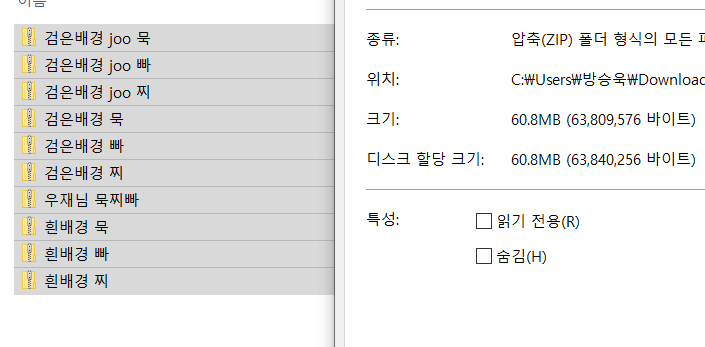
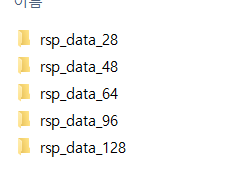
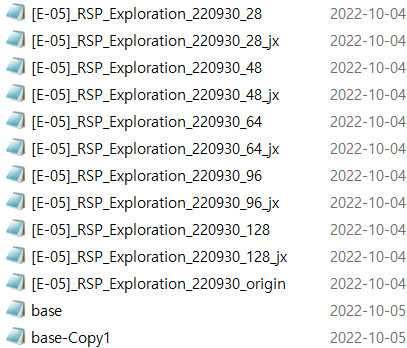

---
### (6) Reference

- https://blog.naver.com/khm159/221811601286 딥러닝 풀링 왜할까?
- https://blog.naver.com/rnjswkdqo/222772599981 Conv2D layer 파라미터
- https://blog.naver.com/win0k/221603387293 keras.dense layer 블로그
- https://www.youtube.com/watch?v=bNb2fEVKeEo CS231 5강 Convolution layer
- https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/ tensorflow 공식문서 한글화링크
- https://www.tensorflow.org/api_docs/python/tf/keras tensorflow 공식문서 영문판 링크
- https://teachablemachine.withgoogle.com/ google 촬영 도움

---
### (7) 자기 다짐

- 이번 프로젝트를 통해 CV 분야에 대해서 좀 더 알아볼 수 있는 기회가 되었고 이제 차차 CV와 NLP 중 고르게 될텐데 큰 도움이 되었습니다.
  
  
- 그래도 아직 딥러닝쪽에서는 매우 부족하구나도 느꼈습니다. 딥러닝 관련 fundamental도 아직 몇개 진행은 안하였지만 layer들의 개념이 명확하지않아 공부할 것이 많이 남았구나 하는 생각이 들었습니다.
  
  
- 특히 PIL 이나 tensorflow 등 유용한 라이브러리인줄은 알고 있었으나 써보니 더욱 체감이 됩니다. 이를 통해 앞으로 공부할 길의 갈피를 잡을수 있게 되어 열심히 해야겠다는 생각이 들었습니다.
  
  
- 그래도 난이도가 올라가고 더욱 많은 라이브러리, 함수 들을 사용하게 되면서 실력이 향상됨을 확실히 느낄 수 있어 앞으로는 더 좋은 결과를 보일 수 있겠다고 느끼고있습니다.
---